## Assignment-07 First Step of using machine learning and models.

![](https://github.com/Computing-Intelligence/jupyters_and_slides/raw/master/entrance-test/images/kkb-ai.png)

In [1]:
fname = '/Users/gaominquan/Downloads/sqlResult_1558435 2.csv'

In [2]:
import pandas as pd

In [3]:
content = pd.read_csv(fname, encoding='gb18030')

In [4]:
content.head()

,id,author,source,content,feature,title,url
0,89617,NaN,快科技@http://www.kkj.cn/,此外，自本周（6月12日）起，除小米手机6等15款机型外，其余机型已暂停更新发布（含开发版/...,"{""type"":""科技"",""site"":""cnbeta"",""commentNum"":""37""...",小米MIUI 9首批机型曝光：共计15款,http://www.cnbeta.com/articles/tech/623597.htm
1,89616,NaN,快科技@http://www.kkj.cn/,骁龙835作为唯一通过Windows 10桌面平台认证的ARM处理器，高通强调，不会因为只考...,"{""type"":""科技"",""site"":""cnbeta"",""commentNum"":""15""...",骁龙835在Windows 10上的性能表现有望改善,http://www.cnbeta.com/articles/tech/623599.htm
2,89615,NaN,快科技@http://www.kkj.cn/,此前的一加3T搭载的是3400mAh电池，DashCharge快充规格为5V/4A。\r\n...,"{""type"":""科技"",""site"":""cnbeta"",""commentNum"":""18""...",一加手机5细节曝光：3300mAh、充半小时用1天,http://www.cnbeta.com/articles/tech/623601.htm
3,89614,NaN,新华社,这是6月18日在葡萄牙中部大佩德罗冈地区拍摄的被森林大火烧毁的汽车。新华社记者张立云摄\r\n,"{""type"":""国际新闻"",""site"":""环球"",""commentNum"":""0"",""j...",葡森林火灾造成至少62人死亡 政府宣布进入紧急状态（组图）,http://world.huanqiu.com/hot/2017-06/10866126....
4,89613,胡淑丽_MN7479,深圳大件事,（原标题：44岁女子跑深圳约会网友被拒，暴雨中裸身奔走……）\r\n@深圳交警微博称：昨日清...,"{""type"":""新闻"",""site"":""网易热门"",""commentNum"":""978"",...",44岁女子约网友被拒暴雨中裸奔 交警为其披衣相随,http://news.163.com/17/0618/00/CN617P3Q0001875...


In [5]:
xinhua_news = content[content['source'] == '新华社']

In [6]:
len(xinhua_news) / len(content)

0.8778051801676133

### 任务描述

报社等相关的机构，往往会遇到一个问题，就是别人家的机构使用自己的文章但是并没有标明来源。 在本次任务中，我们将解决新华社的文章被抄袭引用的问题。

给定的数据集合中，存在一些新闻预料，该预料是来自新华社，但是其来源并不是新华社，请设计技巧学习模型解决该问题。

![](https://timgsa.baidu.com/timg?image&quality=80&size=b9999_10000&sec=1566105348906&di=ee9a2de91207767364853d4decc6cca3&imgtype=0&src=http%3A%2F%2Fmmbiz.qpic.cn%2Fmmbiz_png%2FTicO2kbP6Ao5sCsSQDpehZiczLdC6hDCNvoicjcOCEKX2bLxBc9gVOw28zHyFibfIWq9ceRibP6HDTKReGkr6YyTfQQ%2F640%3Fwx_fmt%3Dpng)

### Step1: 数据分析

请在课程的GitHub中下载数据集，然后使用pandas进行读取。

In [1]:
# it‘s your time
import pandas as pd
content = pd.read_csv('./sqlResult_1558435.csv', encoding='gb18030')

In [27]:
content.iloc[1]

id                                                     89616
author                                                   NaN
source                                快科技@http://www.kkj.cn/
content    骁龙835作为唯一通过Windows 10桌面平台认证的ARM处理器，高通强调，不会因为只考...
feature    {"type":"科技","site":"cnbeta","commentNum":"15"...
title                             骁龙835在Windows 10上的性能表现有望改善
url           http://www.cnbeta.com/articles/tech/623599.htm
Name: 1, dtype: object

### Step2: 数据预处理

将pandas中的数据，依据是否是新华社的文章，请改变成新的数据dataframe: <content, y>, 其中，content是文章内容，y是0或者1. 你可能要使用到pandas的dataframe操作。https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.apply.html

In [2]:
# it's your time
data = pd.DataFrame({'content':content['content'],'y':content['source']=='新华社'})
data=data.dropna(axis=0)
print(data)

                                                 content      y
0      此外，自本周（6月12日）起，除小米手机6等15款机型外，其余机型已暂停更新发布（含开发版/...  False
1      骁龙835作为唯一通过Windows 10桌面平台认证的ARM处理器，高通强调，不会因为只考...  False
2      此前的一加3T搭载的是3400mAh电池，DashCharge快充规格为5V/4A。\r\n...  False
3        这是6月18日在葡萄牙中部大佩德罗冈地区拍摄的被森林大火烧毁的汽车。新华社记者张立云摄\r\n   True
4      （原标题：44岁女子跑深圳约会网友被拒，暴雨中裸身奔走……）\r\n@深圳交警微博称：昨日清...  False
5      　　受到A股被纳入MSCI指数的利好消息刺激，A股市场从周三开始再度上演龙马行情，周四上午金...  False
6      虽然至今夏普智能手机在市场上无法排得上号，已经完全没落，并于 2013 年退出中国市场，但是...  False
7      　　沙漠雄鹰：震荡有利消化套牢筹码\r\n　　周四开盘上证50在银行券商大蓝筹带动下一度涨近...  False
8      （原标题：武汉警方一下子抓了808人，还都是俊男靓女！原来他们每天偷偷摸摸干这事！）\r\n...  False
9      　　6月21日，A股纳入MSCI指数尘埃落定，但当天被寄予厚望的券商股并未扛起反弹大旗。22...  False
10     　　证券时报网（www.stcn.com）06月23日讯\r\n　　据上证报道，6月初以来，...  False
11     ?\r\n　　巨丰早评：市场将再次探底\r\n　　【巨丰观点】\r\n　　周四大盘冲高回落，...  False
12     中新网6月19日电 据外媒报道，美国底特律一名男子1976年因为一根头发被定谋杀罪，监禁41...  False
13     　　曹先生：风格转换前的阵痛\r\n　　今日早盘两地低开，之后一度震荡走高，领涨的仍然是上证...  False
14     6月21日，MSCI在官网发布公告称，从明年6月起将中国A股纳入M

### Step3: 使用tfidf进行文本向量化

参考 https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html 对

对文本进行向量化

In [3]:
from sklearn.feature_extraction.text import TfidfVectorizer
import cut_sentence as cs
from collections import defaultdict

#1. 统计词频
tf=defaultdict(int)
for index,row in data.iterrows():
    words_list = cs.segment(row['content'],type="arr")
    for word in words_list:
        tf[word]+=1
#     break
# print(tf)


Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\Raytine\AppData\Local\Temp\jieba.cache
Loading model cost 0.572 seconds.
Prefix dict has been built succesfully.


In [4]:
#2. 查看高频和低频词分布情况
result = sorted(tf.items(),key=lambda item: item[1])
print(len(result),result[0],result[len(result)-1])
# new_list = list(zip(*result))
plot_y=[item[1] for item in result]
# print(plot_y)
# for item in tf:
#     if item[1]<30 or item[1]>

257913 ('体验版', 1) ('的', 703820)


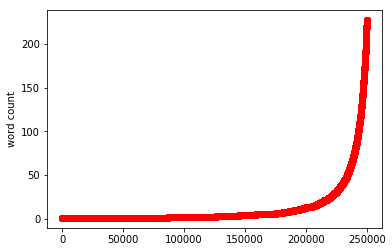

In [6]:
import matplotlib.pyplot as plt

plt.ylabel('word count')
start = 0
end = 250000
plt.plot(range(end-start), plot_y[start:end],'ro')
plt.show()

In [5]:
#3. 根据上图挑选词频大于100小于400的词作为feature
# 构建vocabulary
vocabulary = defaultdict(int)
index = 0
for item in result:
    if item[1]>150 and item[1]<350:
        vocabulary[item[0]]=index
        index+=1
print(len(vocabulary))

5294


In [6]:
#4. 使用tfidf向量化
from scipy.sparse import dok_matrix

def flatten2line(doc):
    #把一篇文档压成一行
    raw_doc=""
    for sentence in doc:
        raw_doc+=sentence
        raw_doc+=" "
#     print(raw_doc)
    return raw_doc

docs=[]
for index,row in data.iterrows():
#     if index>1: break
    doc = cs.cut_and_segment(row['content'])
    if len(doc)==0:
#         print(index,row['content'],doc)
        docs.append("")
        continue
#    print(doc)
    doc = flatten2line(doc)
    docs.append(doc)

tfidf = TfidfVectorizer(max_features=len(vocabulary),vocabulary=vocabulary)
vectorize = tfidf.fit_transform(docs)
    
print(vectorize[0,:])
# plt.ylabel('valid feature count')
# plt.plot(range(len(simple_count)), sorted(simple_count),'ro')
# plt.show()

  (0, 4298)	0.4464736950752448
  (0, 3785)	0.7951928607453268
  (0, 2491)	0.41027984818355445


In [7]:
tfidf_value = []
for m in vectorize:
    tfidf_value.append(dok_matrix(m))
print(vectorize[1,:])
data['tfidf'] = tfidf_value
# V = vectorize.toarray()
# V=V.tolist()
# print(data)

  (0, 5146)	0.26711985487242945
  (0, 5145)	0.5154473635798357
  (0, 4831)	0.254211870176648
  (0, 4298)	0.2753746744879518
  (0, 4060)	0.24286750039290994
  (0, 3642)	0.2556159787512758
  (0, 3068)	0.24841955977985275
  (0, 2847)	0.2757340578153757
  (0, 2705)	0.2544090793424274
  (0, 2306)	0.2519272740548806
  (0, 2153)	0.26043065266446724
  (0, 1981)	0.2538207175370605


### Step4: 参考scikit-learning的方法，构建你的第一个机器学习模型

+ 按照课程讲解的内容，把数据集分割为 traning_data, validation_data, test_data. https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data[['tfidf','content']],data['y'])

print(X_test)

                                                   tfidf  \
65118                                                 {}   
31743  {(0, 1008): 0.23567883004325846, (0, 1185): 0....   
83286                                                 {}   
61597  {(0, 558): 0.18551368783771044, (0, 1402): 0.1...   
65675  {(0, 91): 0.5485714606500665, (0, 419): 0.1267...   
23083  {(0, 65): 0.17828932949483126, (0, 2087): 0.95...   
80008                                                 {}   
34062                                                 {}   
84601  {(0, 1602): 0.36076982309931993, (0, 3040): 0....   
60987                                                 {}   
69595  {(0, 3347): 0.34345974844623883, (0, 3561): 0....   
89139  {(0, 2757): 0.20936923080427897, (0, 3040): 0....   
13204                                   {(0, 3449): 1.0}   
40724  {(0, 288): 0.19097518637683886, (0, 289): 0.20...   
18266                                   {(0, 3459): 1.0}   
72942  {(0, 430): 0.23461850193447079, (

+ 参照scikit learning的示例，从构建你的第一个KNN机器学习模型。

In [10]:
import numpy as np
from sklearn.neighbors import NearestNeighbors

neigh = NearestNeighbors(algorithm='kd_tree',n_jobs=4)
x_train=[]
for item in X_train['tfidf'].values:
    x_train.append(item.toarray()[0])
print(len(x_train),len(y_train))
neigh.fit(x_train,y_train)

x_test=[]
for item in X_test['tfidf'].values:
    x_test.append(item.toarray()[0])

65290 65290


In [12]:
y_indexes = neigh.kneighbors(x_test,return_distance=False)
y_hat = []
for row in y_indexes:
    opp_cnt = 0
    neg_cnt = 0
    for index in row:
        if y_train.iloc[index]==True: opp_cnt+=1
        else: neg_cnt+=1
    if opp_cnt>=neg_cnt:
        y_hat.append(True)
    else:
        y_hat.append(False)

### Step5: 在traning_data, validation_data, test_data 上观察其相关metric: recall, precision, f1等， 并解释其含义. 

In [13]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score

# Precision表示判定为新华社的数据中真正是新华社的数据比例
print(precision_score(y_test,y_hat))
# Recall表示新华社样本中判定正确的比例
print(recall_score(y_test,y_hat))
# f1认为precision和recall同等重要
print(f1_score(y_test,y_hat))

0.9213376850669316
0.9908434225251805
0.9548273241991226


### Step6: 使用 test_data 对其进行新数据的判断, 你有没

In [10]:
# it's your time

### Step7: 调整不同的参数，观察变化

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

scores = ['f1']
# scores = ['precision', 'recall','f1']

parameters={'leaf_size':[10,20,30],'weights':['uniform','distance']}
for score in scores:
    print('\n\n%s_weighted: ' % score)
    neigh = KNeighborsClassifier(algorithm='kd_tree',n_jobs=4)
    clf = GridSearchCV(neigh,parameters,cv=3,scoring='%s_weighted' % score)
    clf.fit(x_train,y_train)
    print(clf.best_params_)
    y_true, y_pred = y_test, clf.predict(x_test)
    print(classification_report(y_true, y_pred))
# clf.predict(x_test)

#KNN速度太慢，放到其他算法再做观察



f1_weighted: 


### Step8: 不断改变参数，直到性能达到“某个”点。问：“某个”怎么定义？

In [12]:
GridSearchCV使用KNeighborsClassifier自身的score来判断得分，得分越高认为性能越好。

### Step9: 找出所以预测为 1， 但是实际为 0 的文章。 作为抄袭的候选者。

In [30]:
contents = X_test['content'].values
# print(type(y_test))
for idx in range(len(y_test)):
    if y_test.values[idx]==False and y_hat[idx]==True:
#         print(content.iloc[y_test.index[idx]])
#         print('~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')
        print(contents[idx])
        print('--------------------------------------------')
        

点击图片进入下一页
当地时间6月10日，英国肯特大学的政治专家马修·古德温在电视节目中直播“吃书”。（图片来源：英国媒体）
中国日报网6月11日电（潘一侨） 当地时间6月10日，英国天空新闻频道现场直播一位政治专家“吃书”，这到底是怎么回事呢？原来是英国大选惹的祸。
据英国《每日邮报》报道，英国一名政治专家马修·古德温在英国大选前曾大胆断言，英国工党会在大选中被击败。当地时间5月27日，古德温在其社交媒体账号上写道：“我想大声地说，我不相信杰里米·科尔宾领导的工党会在大选中赢得38%以上的选票，如果他们做到了，我将在电视直播节目中吃掉我新发行的一本关于‘英国脱欧’的书。” 在英国这场备受关注的提前大选中，古德温的这一言论立即引发网民关注，该消息被转发了1000次。
6月8日英国大选投票结果出炉，工党赢得了40%的选票，这名来自肯特大学的教授古德温表示，他将履行自己的诺言。他在自己的社交媒体账号上写道：“好吧，你赢了。10日，我将在天空新闻频道下午4点半的直播节目中，吃掉我的一本书。”
据权威人士介绍，天空新闻已表示这次表演是卫生和安全的。但当古德温把书页折叠放进嘴里时，看起来还是有些令人担心。不过，在开始吃这部巨著第二部分的书页时，他还对着镜头竖起了大拇指。

--------------------------------------------
　　【环球网报道 记者 王欢】据日本共同社6月19日报道，斯巴鲁(SUBARU)公司19日宣布，已开发出可在高速公路上以时速0至120公里速度跟随行驶的自动驾驶新功能。据称该功能大幅减轻了油门、刹车、方向盘操作的负担，将可安全舒适地驾驶作为卖点。将在今夏发售的轿车“Levorg”等配备该功能。
　　该功能改进了独创的驾驶辅助系统“EyeSight”，司机不踩油门和刹车也能与前方车辆保持一定距离行驶。此前时速100公里曾是极限。考虑到堵车的情况在时速0至60公里之间可自动停车等跟随前方行驶的车辆。
　　斯巴鲁在发布消息之前，在茨城县的试车路线面向媒体举行了试乘会。搭载新技术的汽车方向盘操作和车辆融为一体，运行十分顺畅。
　　EyeSight通过车载摄像头感知前方车辆和车道，判断状况进行自动操作，是斯巴鲁的独创技术。力争到2020年在车上搭载卫星定位系统(GPS)和雷达、实现高速公路自动变道的实际应用、并提升避免交叉口事故的

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



### Step10： 总结该过程，什么是数据思维？什么是机器学习思维？

数据思维以数据为导向，对数据采用各种方式进行分析，如统计学方法、机器学习、深度学习等，目的是挖掘隐藏在数据后面的信息。
机器学习思维是数据思维的一种，它以机器学习作为主要的分析方法。

### (Optional)使用第4课讲解的 edit distance，在涉嫌抄袭的文章中，找到其重复的文字与被修改过的文字。 

### Step11: 利用第8课讲述的新模型，进行操作，感受其中不同的参数、模型对性能的影响。

见assignment-08